#Regresión Lineal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
datos = pd.read_csv("/content/data.csv")
datos

,metro,precio
0,5,375
1,15,487
2,20,450
3,25,500


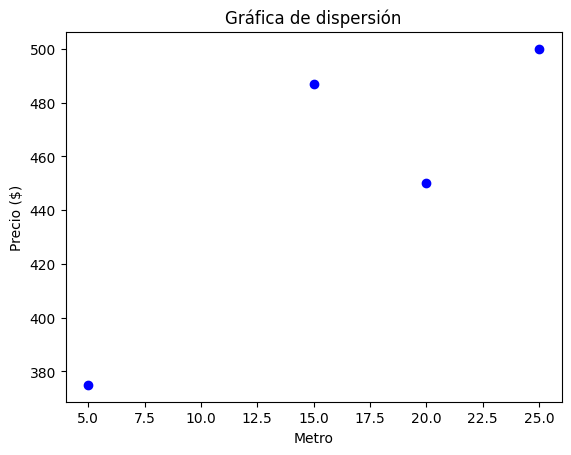

In [ ]:
plt.title("Gráfica de dispersión")
plt.ylabel("Precio ($)")
plt.xlabel("Metro")
plt.scatter(datos['metro'],datos['precio'],color ="blue")
plt.show()

In [ ]:
from sklearn import linear_model
regresion =linear_model.LinearRegression()
x= datos['metro'].values.reshape((-1,1))
y= datos['precio'].values.reshape((-1,1))
modelo= regresion.fit(x,y)
b=modelo.intercept_
m= modelo.coef_
print("Intersepto (b) :{:.2f}".format(float(b)))
print("Pendiente (m) : {:.2f}".format(float(m)))


Intersepto (b) :361.26
Pendiente (m) : 5.65


##Gráfica del modelo


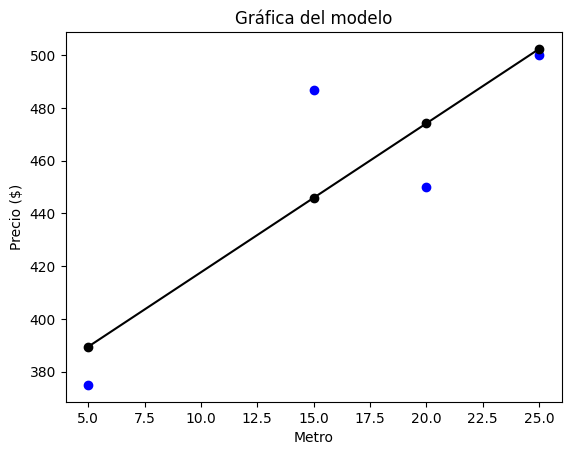

In [ ]:
plt.title("Gráfica del modelo")
plt.ylabel("Precio ($)")
plt.xlabel("Metro")
plt.scatter(datos['metro'],datos['precio'],color ="blue")
y_predi= modelo.predict(x)
plt.plot(x,y_predi, color='black',marker="o")
plt.show()

## Metricas de regresión lineal

###Error Cuadrático medio

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predi)

621.385714285714

#####Este valor indica que la función  predice un resultado con un error de 621.38 unidades de precio cuadrado, que por tener unidades cuadradas no brinda mucha claridad. Pero si se observa que es un valor grande comparada con los datos utilizados en el modelo

###Raíz cuadrada del error cuadrático medio

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predi,squared=False)

24.927609477960658

##### Este valor indica que el modelo predice el valor del precio con un error cuadratico medio, cuyo raiz cudrada es de 24.92 unidades de precio.Aqui se observa que este error tiene las unidades lineales, lo que facilita su interpretación

###R^2 (Coeficiente de determinación)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,y_predi)

0.737202066277981

El valor 0.7372 indica que el 73.72% de las veces,  el modelo explica el precio a partir de los metros, este valor nos indica que el modelo no es muy bueno.

#Regresión Logística

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
datos= pd.read_csv("/content/framingham.csv")
datos.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
datos.shape


(4238, 16)

###  1.Revisión del dataset para determinar si hay datos nulos y observar medidas estadísticas

In [ ]:
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### 2. cuantificación los registros nulos

In [ ]:
datos.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

###3. Cuantificación de los registros repetidos

In [ ]:
datos.duplicated().sum()

0

### 4.Borrado de registros nulos

In [ ]:
datos1=datos.dropna()
datos1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


### 5. Calculo de la matriz de correlación

In [ ]:
matriz_corr=datos1.corr().round(3)
matriz_corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000,-0.024,0.018,0.207,0.331,-0.052,-0.002,0.001,0.014,-0.070,-0.045,0.052,0.073,-0.115,0.003,0.092
age,-0.024,1.000,-0.159,-0.211,-0.189,0.135,0.051,0.307,0.109,0.268,0.389,0.209,0.137,-0.003,0.118,0.234
education,0.018,-0.159,1.000,0.025,0.014,-0.014,-0.030,-0.079,-0.040,-0.013,-0.125,-0.059,-0.137,-0.064,-0.032,-0.063
currentSmoker,0.207,-0.211,0.025,1.000,0.774,-0.052,-0.038,-0.108,-0.042,-0.051,-0.134,-0.116,-0.160,0.050,-0.053,0.019
cigsPerDay,0.331,-0.189,0.014,0.774,1.000,-0.046,-0.036,-0.070,-0.037,-0.030,-0.095,-0.057,-0.087,0.064,-0.054,0.052
BPMeds,-0.052,0.135,-0.014,-0.052,-0.046,1.000,0.113,0.263,0.049,0.094,0.271,0.200,0.106,0.013,0.054,0.089
prevalentStroke,-0.002,0.051,-0.030,-0.038,-0.036,0.113,1.000,0.066,0.010,0.013,0.061,0.056,0.036,-0.017,0.016,0.048
prevalentHyp,0.001,0.307,-0.079,-0.108,-0.070,0.263,0.066,1.000,0.081,0.167,0.698,0.618,0.303,0.147,0.087,0.182
diabetes,0.014,0.109,-0.040,-0.042,-0.037,0.049,0.010,0.081,1.000,0.048,0.103,0.051,0.089,0.061,0.615,0.093
totChol,-0.070,0.268,-0.013,-0.051,-0.030,0.094,0.013,0.167,0.048,1.000,0.220,0.175,0.121,0.093,0.050,0.091


### 6. Ordenamiento de todas las varibles ascedentemente en relación a la columna 'TenYearCHD', a partir de matriz de correlación

In [ ]:
matriz_corr['TenYearCHD'].sort_values(ascending=False)

TenYearCHD         1.000
age                0.234
sysBP              0.223
prevalentHyp       0.182
diaBP              0.150
glucose            0.122
diabetes           0.093
male               0.092
totChol            0.091
BPMeds             0.089
BMI                0.082
cigsPerDay         0.052
prevalentStroke    0.048
heartRate          0.021
currentSmoker      0.019
education         -0.063
Name: TenYearCHD, dtype: float64

### 7. Filtrado de datos
### Se descarta la columna currentSmoker porque la correlación es menor del 2%

In [ ]:
datos_final=datos1.drop(["currentSmoker"],axis=1)
datos_final

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


###8. Modelo de regresión logistica

In [ ]:
x_entrena=datos_final.iloc[:,0:13].values
x_entrena

array([[ 1.  , 39.  ,  4.  , ..., 70.  , 26.97, 80.  ],
       [ 0.  , 46.  ,  2.  , ..., 81.  , 28.73, 95.  ],
       [ 1.  , 48.  ,  1.  , ..., 80.  , 25.34, 75.  ],
       ...,
       [ 1.  , 50.  ,  1.  , ..., 92.  , 25.97, 66.  ],
       [ 1.  , 51.  ,  3.  , ..., 80.  , 19.71, 65.  ],
       [ 0.  , 52.  ,  2.  , ..., 83.  , 21.47, 80.  ]])

In [ ]:
y_entrena=datos_final["TenYearCHD"].values
y_entrena


array([0, 0, 0, ..., 1, 0, 0])

###9. Separación de datos de entrenamiento y testeo con sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_entrena, y_entrena, test_size = 0.2)

###10. Entrenar el modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
regre = LogisticRegression(solver = 'liblinear')
regre.fit(x_train, y_train)

y_predi = regre.predict(x_test)
y_predi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("prediccion:", y_predi[:15])
print("real:", list(y[:15]))

prediccion: [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
real: [array([375]), array([487]), array([450]), array([500])]


###11. Metricas de regresión lineal

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
conf_mat = confusion_matrix(y_true = y_test, y_pred=y_predi)
print(conf_mat)

print("Exactitud del set de prueba:",metrics.accuracy_score(y_test, y_predi))
print("Precision:",metrics.precision_score(y_test, y_predi))
print("Recall:",metrics.recall_score(y_test, y_predi))

[[610   7]
 [106   9]]
Exactitud del set de prueba: 0.8456284153005464
Precision: 0.5625
Recall: 0.0782608695652174


##### La exactitud del 0.8456 indica que el modelo predice correctamente un resultado en el 84.56 % de las veces.
##### Una precisión de 0.5625 indica que el 56.25% de todos los casos diagnosticados como positivos de riesgo de enfermedad cardiaca, fueron predichos correctamente.
##### Un Recall de 0.07826 indica que el 7.8 % de todos los casos que realmente eran positivos de riesgo cardiaco, fueron predichos correctamente
#####Aunque el modelo tiene una exactitud del 84%, tiene una precisión baja, y un Recall muy bajo,por lo tanto el modelo  no es muy bueno clasifacando el riesgo cardiaco.

#  12. Árbol de decisión

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
datos=pd.read_excel("/content/datos_arbol.xlsx")
datos.head()

,Cultivo,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,1423,1.71,243,156,127,2.80,3.06,0.28,2.29,564,1.04,392,1065
1,1,132,1.78,214,112,100,2.65,2.76,0.26,1.28,438,1.05,34,1050
2,1,1316,2.36,267,186,101,2.80,3.24,0.30,2.81,568,1.03,317,1185
3,1,1437,1.95,25,168,113,3.85,3.49,0.24,2.18,78,0.86,345,1480
4,1,1324,2.59,287,21,118,2.80,2.69,0.39,1.82,432,1.04,293,735


In [ ]:
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivo               178 non-null    int64  
 1   Alcohol               178 non-null    int64  
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    int64  
 4   Alcalinity of ash     178 non-null    int64  
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    int64  
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    int64  
 13  Proline               178 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 19.6 KB


,Cultivo,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,178.000000,178.000000
mean,1.938202,1171.988764,2.336348,190.337079,107.477528,99.741573,2.295112,2.029270,0.361854,1.590899,5.587178e+04,0.957449,229.971910,746.893258
std,0.775035,374.934073,1.117146,92.441393,89.318968,14.282484,0.625851,0.998859,0.124453,0.572359,7.420172e+05,0.228572,101.656363,314.907474
min,1.000000,12.000000,0.740000,2.000000,12.000000,70.000000,0.980000,0.340000,0.130000,0.410000,2.000000e+00,0.480000,2.000000,278.000000
25%,1.000000,1210.000000,1.602500,192.000000,20.000000,88.000000,1.742500,1.205000,0.270000,1.250000,4.525000e+01,0.782500,167.250000,500.500000
50%,2.000000,1285.000000,1.865000,228.000000,113.000000,98.000000,2.355000,2.135000,0.340000,1.555000,8.950000e+01,0.965000,260.000000,673.500000
75%,3.000000,1358.000000,3.082500,248.000000,188.000000,107.000000,2.800000,2.875000,0.437500,1.950000,4.272500e+02,1.120000,312.000000,985.000000
max,3.000000,1483.000000,5.800000,323.000000,285.000000,162.000000,3.880000,5.080000,0.660000,3.580000,9.899999e+06,1.710000,392.000000,1680.000000


In [ ]:
datos.shape

(178, 14)

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

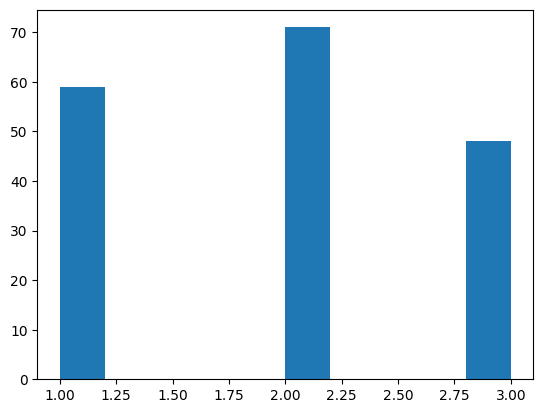

In [ ]:
plt.hist(datos.Cultivo)

#### En esta gráfica se muestra un histograma donde se relacionan los 3 cultivos

In [ ]:
datos.isnull().sum()

Cultivo                 0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [ ]:
x=datos.iloc[:,1:13].values
x

array([[1.423e+03, 1.710e+00, 2.430e+02, ..., 5.640e+02, 1.040e+00,
        3.920e+02],
       [1.320e+02, 1.780e+00, 2.140e+02, ..., 4.380e+02, 1.050e+00,
        3.400e+01],
       [1.316e+03, 2.360e+00, 2.670e+02, ..., 5.680e+02, 1.030e+00,
        3.170e+02],
       ...,
       [1.327e+03, 4.280e+00, 2.260e+02, ..., 1.020e+02, 5.900e-01,
        1.560e+02],
       [1.317e+03, 2.590e+00, 2.370e+02, ..., 9.300e+01, 6.000e-01,
        1.620e+02],
       [1.413e+03, 4.100e+00, 2.740e+02, ..., 9.200e+01, 6.100e-01,
        1.600e+01]])

In [ ]:
y=datos.iloc[:,0].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

Debido a que hay columnas que tiene valores númercos muy grandes (por ej:
 magnesio) y otras con valores númericos muy pequeños(por ej:intesidad de color). Se decide hacer un escalado robusto de los datos.

In [ ]:
from sklearn.preprocessing import RobustScaler
escalado_robusto=RobustScaler()
x_escalada= escalado_robusto.fit_transform(x)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_escalada,y,test_size=0.2,random_state=10)

In [ ]:
arbol_decision=DecisionTreeClassifier()

In [ ]:
arbol=arbol_decision.fit(x_train,y_train)

In [ ]:
y_predi=arbol_decision.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_predi)

[Text(0.47058823529411764, 0.9166666666666666, 'x[6] <= -0.425\ngini = 0.662\nsamples = 142\nvalue = [49, 53, 40]'),
 Text(0.23529411764705882, 0.75, 'x[10] <= -0.104\ngini = 0.201\nsamples = 44\nvalue = [0, 5, 39]'),
 Text(0.11764705882352941, 0.5833333333333334, 'x[3] <= -0.571\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.058823529411764705, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.17647058823529413, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]'),
 Text(0.35294117647058826, 0.5833333333333334, 'x[0] <= -0.057\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.29411764705882354, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.4117647058823529, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.7058823529411765, 0.75, 'x[0] <= -0.044\ngini = 0.51\nsamples = 98\nvalue = [49, 48, 1]'),
 Text(0.5882352941176471, 0.5833333333333334, 'x[0] <= -4.473\ngini = 0.219\nsamp

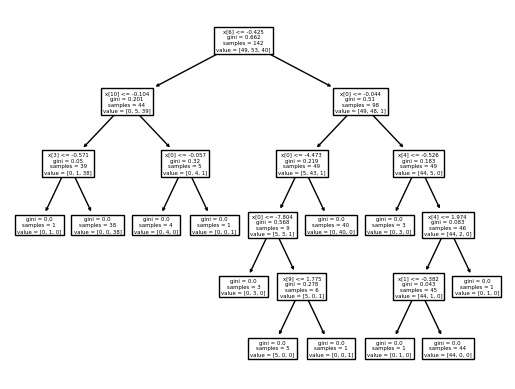

In [ ]:
plot_tree(arbol)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test,y_predi)


array([[10,  0,  0],
       [ 0, 16,  2],
       [ 0,  0,  8]])

In [ ]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([1, 2, 3])

In [ ]:
def tabla_matriz_confu(y_verdadero,y_predicho):
  etiquetas = unique_labels(y_test)
  columna = [f'Predicción_Cultivo_{etiqueta}'for etiqueta in etiquetas]
  fila = [f'Verdadero_Cultivo_{etiqueta}'for etiqueta in etiquetas]
  tabla = pd.DataFrame(confusion_matrix(y_test,y_predi),columns=columna,index= fila)
  return tabla

#### La función tabla_matriz_confu permite a partir de la matriz de cofusión, hacer una tabla , que etiqueta dicha matriz, facilitando su compresión

In [ ]:
tabla_matriz_confu(y_test,y_predi)

,Predicción_Cultivo_1,Predicción_Cultivo_2,Predicción_Cultivo_3
Verdadero_Cultivo_1,10,0,0
Verdadero_Cultivo_2,0,16,2
Verdadero_Cultivo_3,0,0,8


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
exactitud=accuracy_score(y_test,y_predi)

In [ ]:
print(f'Exactitud del modelo : ', exactitud)

Exactitud del modelo :  0.9444444444444444


In [ ]:
reporte=classification_report(y_test,y_predi)

In [ ]:
print("\n\t\t\tInforme de Clasificación")
print(reporte)


			Informe de Clasificación
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.89      0.94        18
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



##### El modelo tiene una exactitud  del 94%.
##### Para el caso del cultivo 1, con una precisión del 100% y un recall del 100% ,como la presición y el recall son muy altos, el modelo predice bastante bien este cultivo.
##### Para el caso del cultivo 2,con una precisión del 100% y un recall del 89%.
##### Como la precisión es alta y el recall es aceptable, el modelo reconoce este cultivo  de forma aceptable,pero cuando lo hace es altamente confiable.
##### Para el caso del cultivo 3, con una presición del 80% y un recall del 100%, como la presición es aceptable, y el recall si  es muy bueno, el modelo detecta muy bien la clase,pero tambien incluye muestras de las otras clases.

##### Teniendo en cuenta el f1-score,el modelo predice bastante bien el cultivo1
#####posteriormente el cultivo 2 y el menor desempeño lo tiene con el cultivo 3

